<a href="https://colab.research.google.com/github/Flaviofrc97/DASCIENSE-MACHINE-LEARNING/blob/main/churn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error

In [ ]:
sns.set(style='darkgrid')

# ***0.0. LOADING DATA***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasests/credit_churn/BankChurners.csv')

## **0.1. data meaning:**

Clientnum: Client number. Unique identifier for the customer holding the account

**Attrition_Flag:** 	Internal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age: Demographic variable - Customer's Age in Years

Gender: Demographic variable - M=Male, F=Female

Dependent_count:	Demographic variable - Number of dependents

Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status: Demographic variable - Married, Single, Unknown

Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K-60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

Card_Category; Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book:Months on book (Time of Relationship)

Total_Relationship_Count: Total no. of products held by the customer

Months_Inactive_12_mon: No. of months inactive in the last 12 months

Contacts_Count_12_mon: No. of Contacts in the last 12 months

Credit_Limit: Credit Limit on the Credit Card

Total_Revolving_Bal: Total Revolving Balance on the Credit Card

Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt: Total Transaction Amount (Last 12 months)

Total_Trans_Ct: Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) 

Avg_Utilization_Ratio: Average Card Utilization Ratio


# ***1. DATA DESCRIPTION***

In [ ]:
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1136,772145658,Existing Customer,43,M,4,Uneducated,Single,$80K - $120K,Blue,32,4,1,3,16043.0,2036,14007.0,0.700,1394,28,0.750,0.127,0.000100,0.99990
4457,823557333,Existing Customer,43,F,2,Uneducated,Unknown,Less than $40K,Blue,39,5,3,3,2734.0,2517,217.0,0.700,4457,86,0.955,0.921,0.000311,0.99969
747,712689333,Existing Customer,38,M,2,Unknown,Single,$80K - $120K,Blue,28,4,3,2,20241.0,1203,19038.0,0.660,1102,31,0.632,0.059,0.000198,0.99980
4848,789477483,Existing Customer,40,F,5,Unknown,Single,Unknown,Blue,31,6,3,1,4433.0,1488,2945.0,0.669,3847,76,0.900,0.336,0.000123,0.99988
9422,715026258,Existing Customer,50,M,1,Graduate,Married,$60K - $80K,Silver,37,1,1,1,6224.0,777,5447.0,0.743,13503,112,0.623,0.125,0.000028,0.99997


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
# DROP IRRELEVANT COLUMN
df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

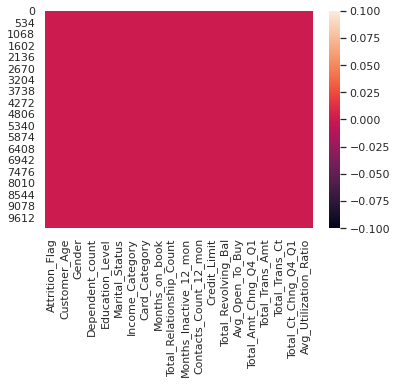

In [ ]:
sns.heatmap(df.isna())

In [ ]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [ ]:
# Target feature is 'Attrition_Flag' in which 'Attrited Customer' means it's a churn (1) and 'Existing Customer' means there is no churn (0)

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

# ***1.1. Separating numerical and categorical***

In [ ]:
df1 = df.copy()

In [ ]:
df1.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
df_num = df1.select_dtypes(include=['int64', 'float64'])
df_cat = df1.select_dtypes(exclude=['int64', 'float64'])
df_num = df_num.iloc[:, 1:15]

In [ ]:
df_num.shape

(10127, 14)

In [ ]:
df_cat.sample()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
1810,M,Uneducated,Married,$80K - $120K,Blue


In [ ]:
df_num.sample()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1666,34,1,36,6,2,3,3735.0,1285,2450.0,1.034,1877,33,1.2,0.344


## HIPOTESES

**1.** Pessoas com limite de credito menor tem mais chance de encerrar a conta?

**2.** Pesssoas mais jovens encerram mais as conta?

**3.** Pessoas com mais de tempo com a conta inativa tem mais chance de encarrar sua conta?

**4.** Pessoas com saldo menor em conta tem mais chancese de encerrar sua conta?

**5.** Pessoas com mais tempo de conta aberta tem menos chances de trocar de banco?


**6.** Pessoas cujo banco não entrar em contato tem mais chances de mudar?

# ***2. EXPLORATORY DATA ANALYSIS (EDA)***

In [ ]:
df2 = df1.copy()

In [ ]:
df2.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## ***2.1. UNIVARIATE ANALYSIS***

## ***2.1.1 RESPONSE VARIABLE***



Text(0.5, 1.0, 'Count values to target variable')

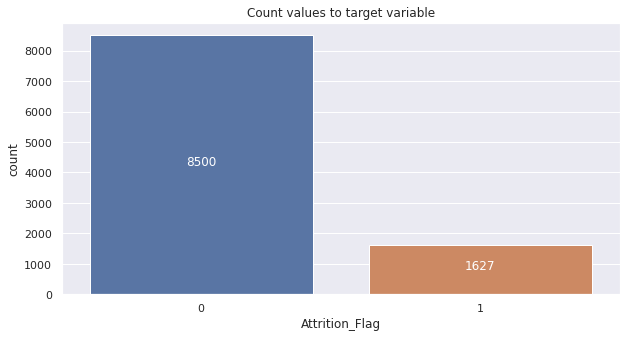

In [ ]:
plt.figure(figsize=(10,5))
g= sns.countplot(x='Attrition_Flag', data=df2);
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')
plt.title('Count values to target variable')



*   As we can see, the base is unbalanced.
*   We will have to do upsampling or downsampling



## ***2.1.2 NUMERICAL VARIABLE***

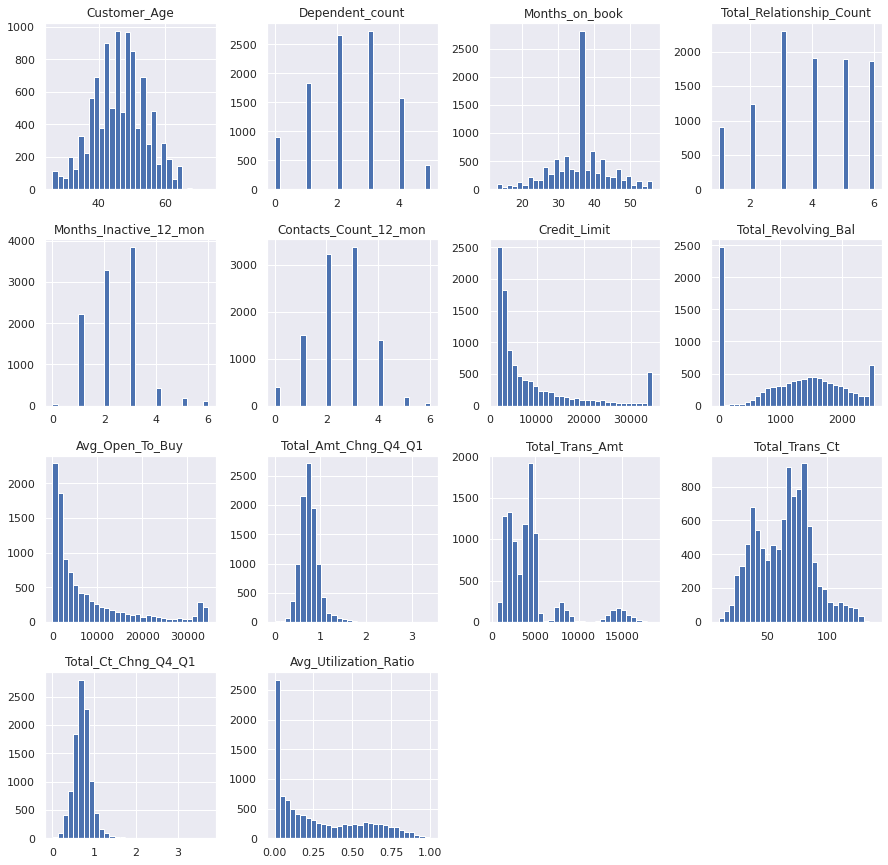

In [ ]:
df_num.hist( bins=30, figsize=(15,15) );

## ***2.1.3 CATEGORICAL VARIABLE***



In [ ]:
df_cat.sample()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
3048,F,Unknown,Unknown,Less than $40K,Blue


In [ ]:
df_cat['Income_Category'] = df_cat['Income_Category'].apply(lambda x:'< $40k' if x == 'Less than $40K' else x);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


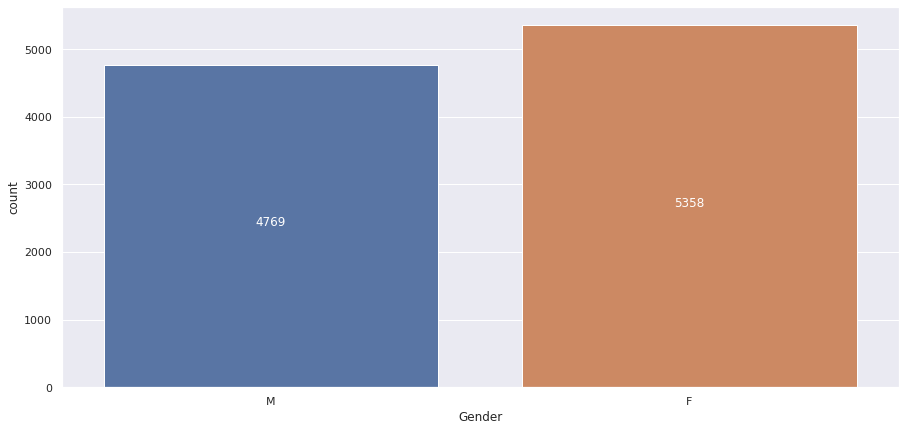

In [ ]:
plt.figure(figsize=(15,7))

g = sns.countplot(x='Gender', data=df_cat);
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')

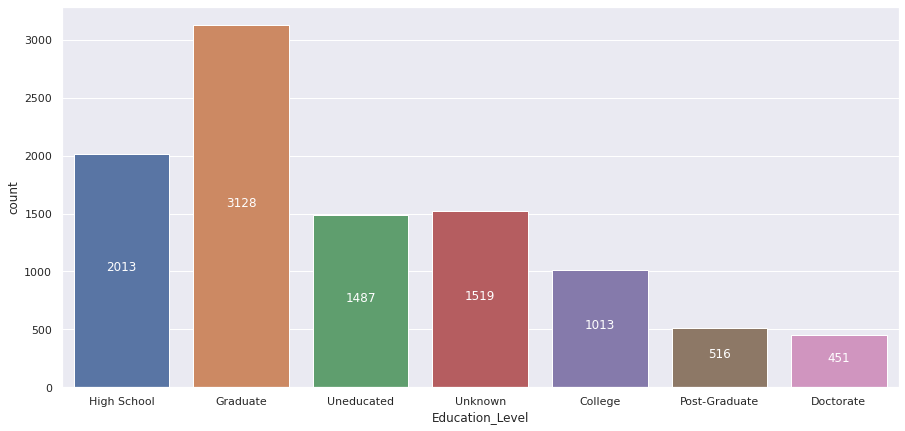

In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(x='Education_Level',data=df_cat);
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')

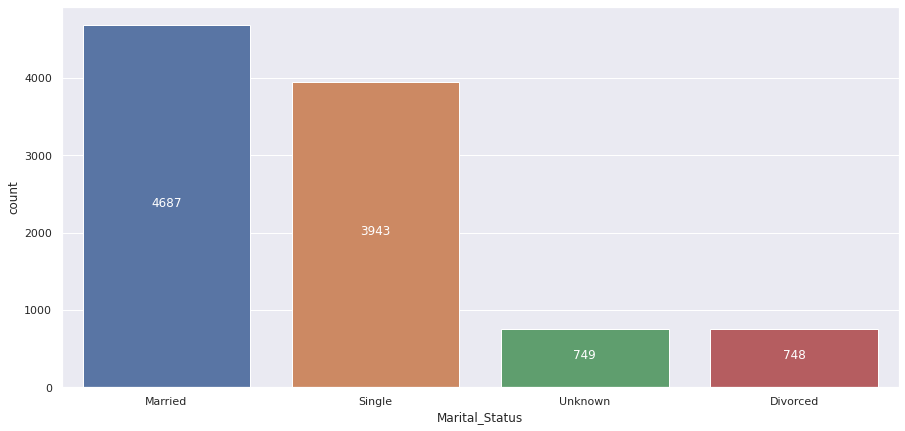

In [ ]:
plt.figure(figsize=(15,7))
g= sns.countplot(x='Marital_Status', data=df_cat);
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')

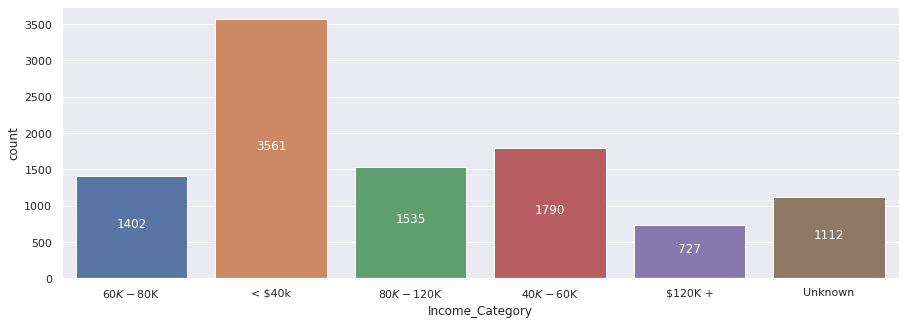

In [ ]:
plt.figure(figsize=(15,5))
g= sns.countplot(x='Income_Category', data=df_cat);
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')

In [ ]:
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

## ***2.2. BIVARIATED ANALYSIS***

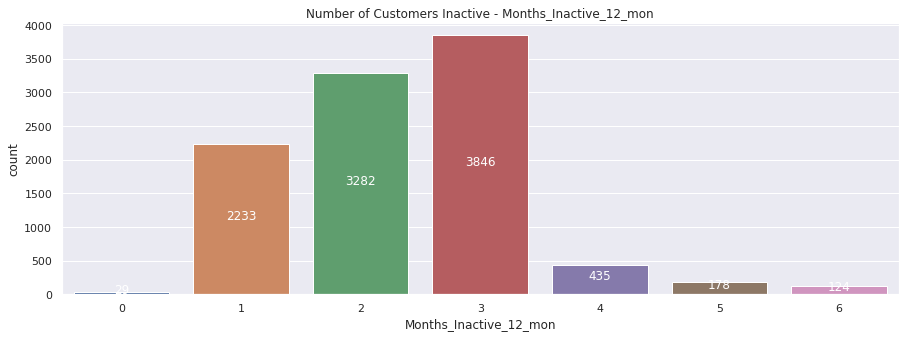

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Number of Customers Inactive - Months_Inactive_12_mon')
g = sns.countplot(x = 'Months_Inactive_12_mon', data = df2)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')

Text(0.5, 0, 'Age')

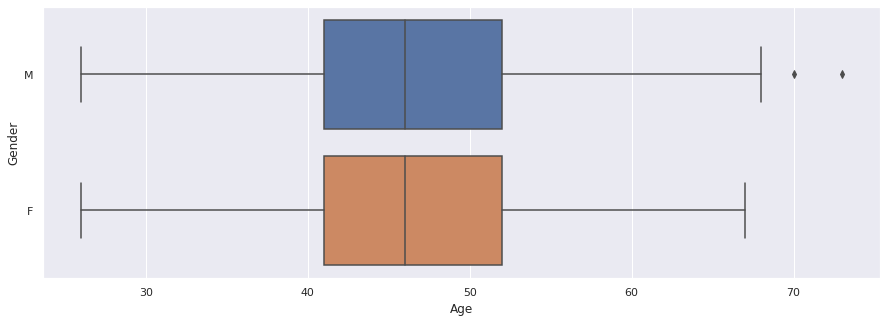

In [ ]:
plt.figure(figsize=[15,5])
sns.boxplot(x=df_num['Customer_Age'], y=df_cat['Gender']);
plt.xlabel('Age')

In [ ]:
df2.sample()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2880,0,36,F,3,High School,Single,Unknown,Blue,23,6,3,4,2804.0,2090,714.0,1.248,2812,77,1.081,0.745


## ***2.3. MULTIVARIATE ANALYSIS***

 **Coeficiente de Pearson varia de -1 a 1. De maneira que:**

**r= 1** Significa uma correlação perfeita e positiva entre as duas variáveis.

Uma correlação negativa e perfeita entre as duas variáveis – Isto é, se uma aumenta, a outra sempre diminui retorna um **r = -1.**

**r= 0** Significa que as duas variáveis não dependem linearmente uma da outra. No entanto, pode existir uma outra dependência que seja “não linear”. Assim, o resultado r=0 deve ser investigado por outros meios.

In [ ]:
correlations = df2.corr(method='pearson')

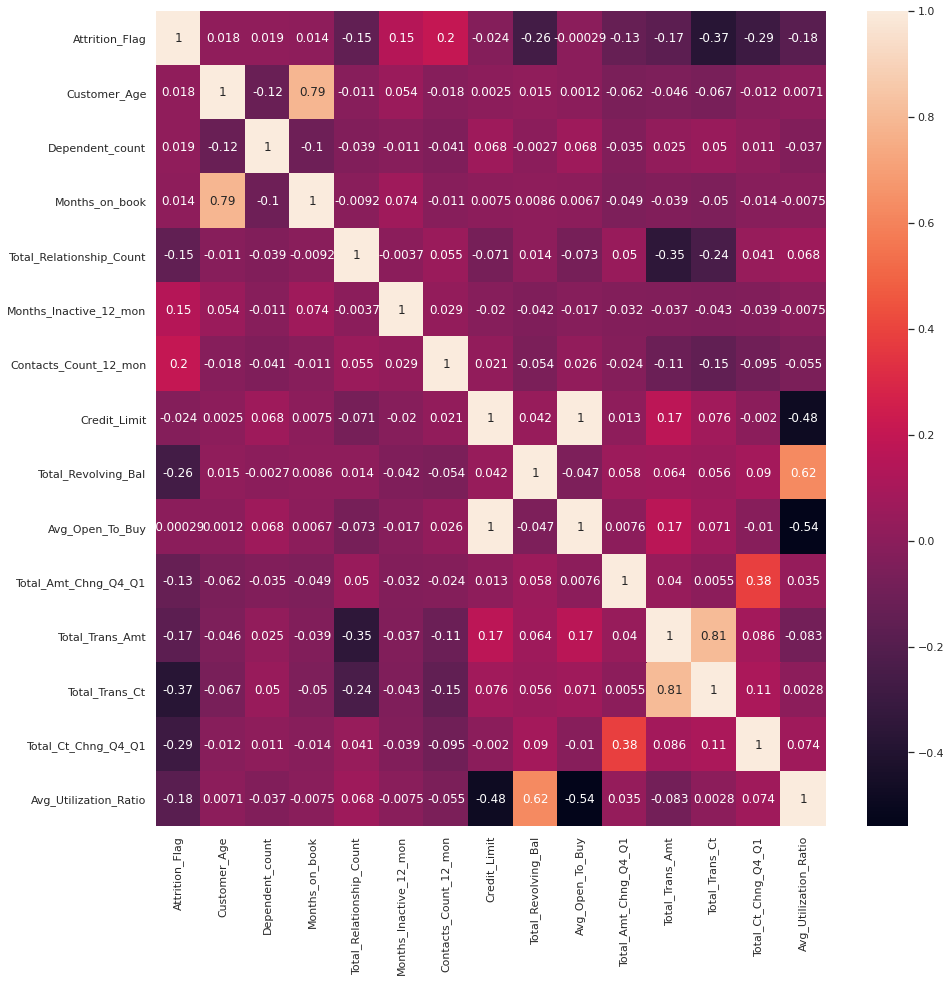

In [ ]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot = True);

# ***3. ANALISANDO HIPOTESES***

In [ ]:
df2.sample()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6573,0,50,M,2,College,Married,$80K - $120K,Blue,39,6,4,2,3606.0,1862,1744.0,0.689,3568,92,0.804,0.516


## **HIPOTESES**

**PESSSOAS MAIS JOVENS ENCERRAM MAIS AS CONTA?**

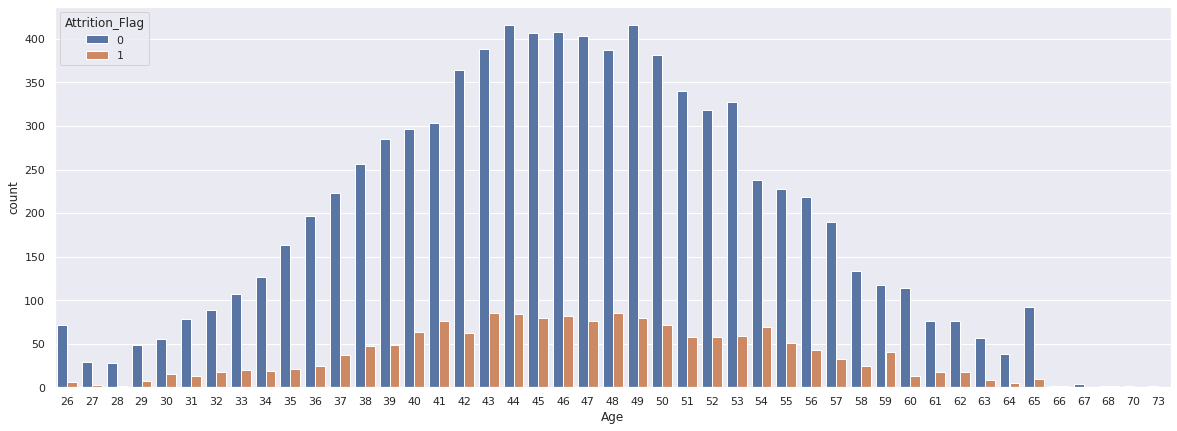

In [ ]:
# Target feature is 'Attrition_Flag' in which 'Attrited Customer' means it's a churn (1) and 'Existing Customer' means there is no churn (0)
plt.figure(figsize=[20,7])
sns.countplot(x='Customer_Age', hue='Attrition_Flag', data=df2);
plt.xlabel('Age');

***PESSOAS COM MAIS DE TEMPO COM A CONTA INATIVA TEM MAIS CHANCE DE ENCARRAR SUA CONTA?***

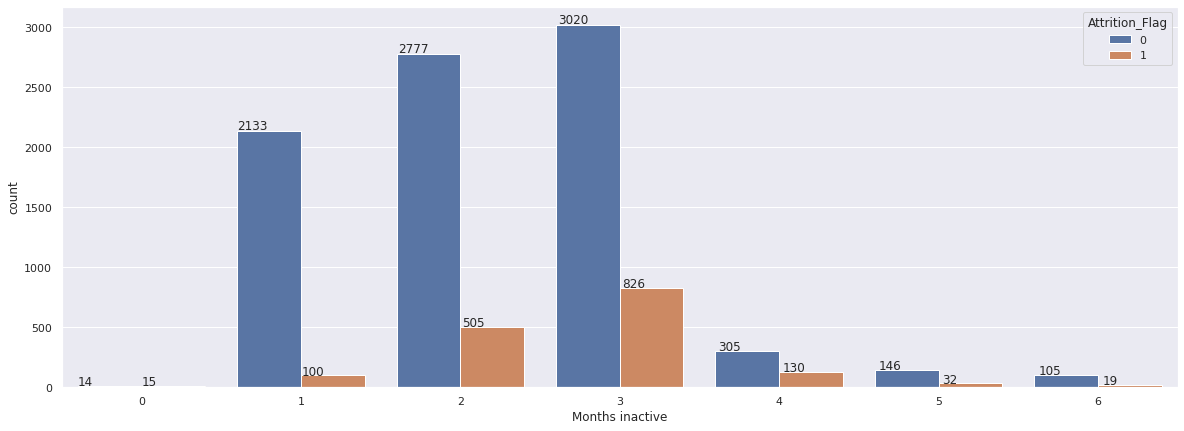

In [ ]:
plt.figure(figsize=[20,7])
ax = sns.countplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', data=df2);
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Months inactive');

***PESSOAS ENQUADRADA NA MENOR FAIXA SALARIAL TEM MAIS CHANCES DE ENCERRAR SUA CONTA?***

In [ ]:
df2['Income_Category'] = df2['Income_Category'].apply(lambda x: '< 40K' if x == 'Less than $40K' else x)

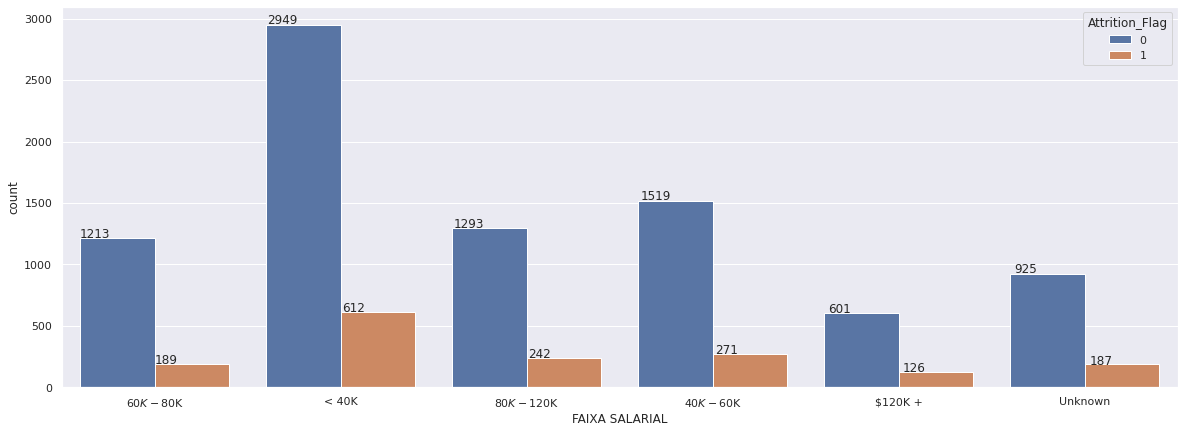

In [ ]:
plt.figure(figsize=[20,7])
ax = sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df2);
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('FAIXA SALARIAL');

**Pessoas cujo banco não entrar em contato tem mais chances de mudar?**



In [ ]:
df2.sample()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3400,0,37,M,2,Uneducated,Divorced,< 40K,Silver,36,3,3,2,11568.0,1846,9722.0,0.755,1701,44,1.095,0.16


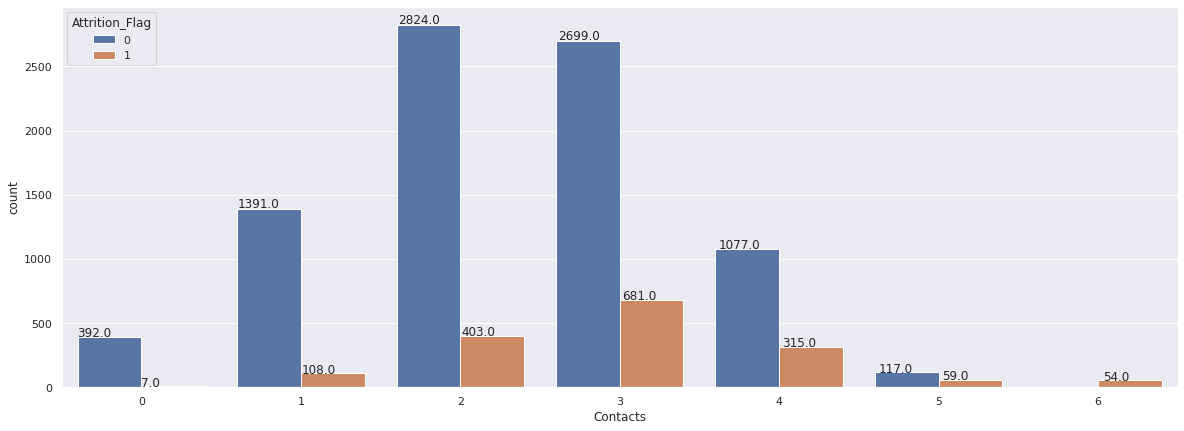

In [ ]:
plt.figure(figsize=[20,7])
ax = sns.countplot(x='Contacts_Count_12_mon', hue='Attrition_Flag', data=df2);
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Contacts');

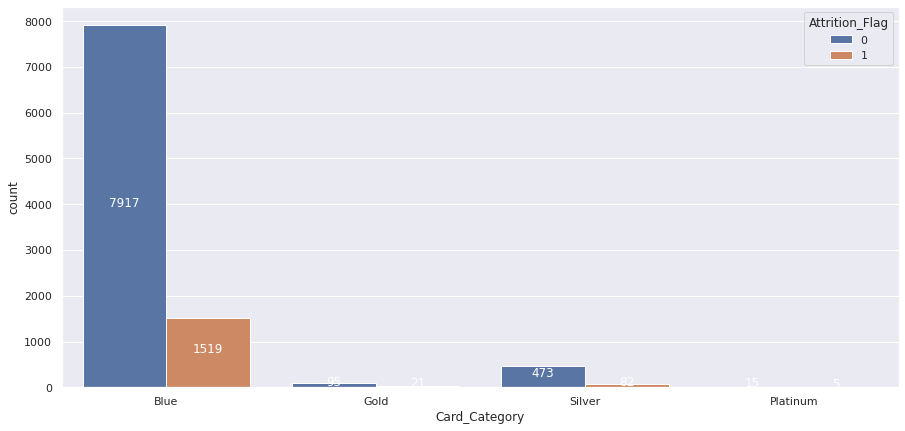

In [ ]:
plt.figure(figsize=(15,7))
g= sns.countplot(x='Card_Category',hue=df2['Attrition_Flag'], data=df_cat);
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')

**WHO HAS A BLUE CREDIT CARD, HAS MORE CHANGES TO CLOSING THE ACCOUNT**

# **PRE-PRECESSAMENTE BASE**

In [ ]:
df_cat.sample()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
8925,M,Uneducated,Married,$80K - $120K,Blue


In [ ]:
df_cat_dummies = pd.get_dummies(df_cat)

In [ ]:
df_cat_dummies.head()

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_< $40k,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
df3 = pd.concat([df_num, df_cat_dummies], axis=1)

In [ ]:
X = df3.copy()
y = df2['Attrition_Flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# **LOGISTIC REGRESSION**

In [ ]:
modelLR = LogisticRegression()

In [ ]:
modelLR.fit(X_train, y_train,);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictLR = modelLR.predict(X_test)

In [ ]:
print('Logistic Regression: \n', classification_report(predictLR, y_test))
print('Logistic Regression Accuracy: ', accuracy_score(predictLR, y_test))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      2758
           1       0.41      0.70      0.52       281

    accuracy                           0.88      3039
   macro avg       0.69      0.80      0.72      3039
weighted avg       0.92      0.88      0.89      3039

Logistic Regression Accuracy:  0.87857847976308


In [ ]:
print('MAE:', mean_absolute_error(predictLR, y_test) )
print('MSE:', mean_squared_error(predictLR, y_test) )
print('RMSE:', np.sqrt(mean_squared_error(predictLR, y_test) ))

MAE: 0.12142152023692004
MSE: 0.12142152023692004
RMSE: 0.3484559085980894


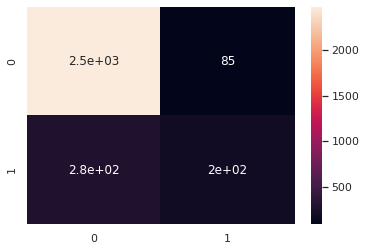

In [ ]:
#Gerando matrix de confusao
cm = confusion_matrix(y_test, predictLR)
sns.heatmap(cm, annot=True);

# **RANDOM FOREST CLASSIFIER**

In [ ]:
modelRF = RandomForestClassifier()

In [ ]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictRF = modelRF.predict(X_test)

In [ ]:
print('Random Forest Classifier : \n', classification_report(predictRF, y_test))
print('Random Forest Classifier Accuracy: ', accuracy_score(predictRF, y_test))

Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2624
           1       0.81      0.94      0.87       415

    accuracy                           0.96      3039
   macro avg       0.90      0.95      0.92      3039
weighted avg       0.97      0.96      0.96      3039

Random Forest Classifier Accuracy:  0.9621586048042119


In [ ]:
print('MAE:', mean_absolute_error(predictRF, y_test) )
print('MSE:', mean_squared_error(predictRF, y_test) )
print('RMSE:', np.sqrt(mean_squared_error(predictRF, y_test) ))

MAE: 0.03784139519578809
MSE: 0.03784139519578809
RMSE: 0.1945286487790117


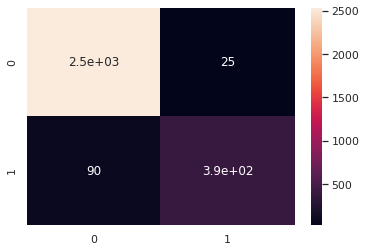

In [ ]:
#Gerando matrix de confusao
cm = confusion_matrix(y_test, predictRF)
sns.heatmap(cm, annot=True);

# **GRADIENT BOOSTING CLASSIFIER**

In [ ]:
modelGB = GradientBoostingClassifier()

In [ ]:
modelGB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
predictGB = modelGB.predict(X_test)

In [ ]:
print('Gradient Boost Classifier : \n', classification_report(predictGB, y_test))
print('Gradient Boost Classifier Accuracy: ', accuracy_score(predictGB, y_test))

Gradient Boost Classifier : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2593
           1       0.86      0.93      0.90       446

    accuracy                           0.97      3039
   macro avg       0.93      0.95      0.94      3039
weighted avg       0.97      0.97      0.97      3039

Gradient Boost Classifier Accuracy:  0.9684106614017769


In [ ]:
print('MAE:', mean_absolute_error(predictGB, y_test) )
print('MSE:', mean_squared_error(predictGB, y_test) )
print('RMSE:', np.sqrt(mean_squared_error(predictGB, y_test) ))

MAE: 0.0315893385982231
MSE: 0.0315893385982231
RMSE: 0.1777338982811751


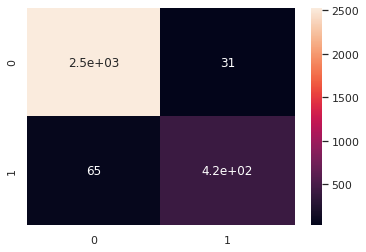

In [ ]:
#Gerando matrix de confusao
cm = confusion_matrix(y_test, predictGB)
sns.heatmap(cm, annot=True);

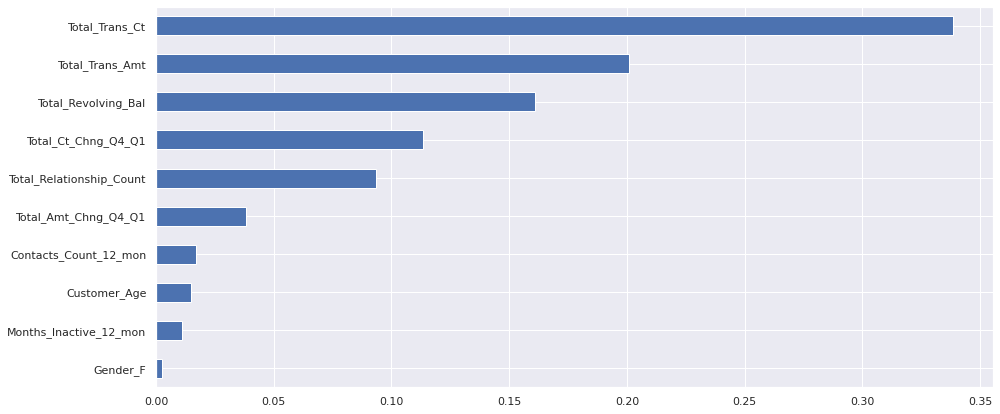

In [ ]:
# get important features
plt.figure(figsize=(15,7))
feature_list = pd.Series(modelGB.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_list.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

# **UNDERSAMPLING**

In [ ]:
x_under = df3.copy()
y_under = df2['Attrition_Flag']

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [ ]:
nr = NearMiss()

In [ ]:
x_under, y_under = nr.fit_sample(x_under, y_under)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


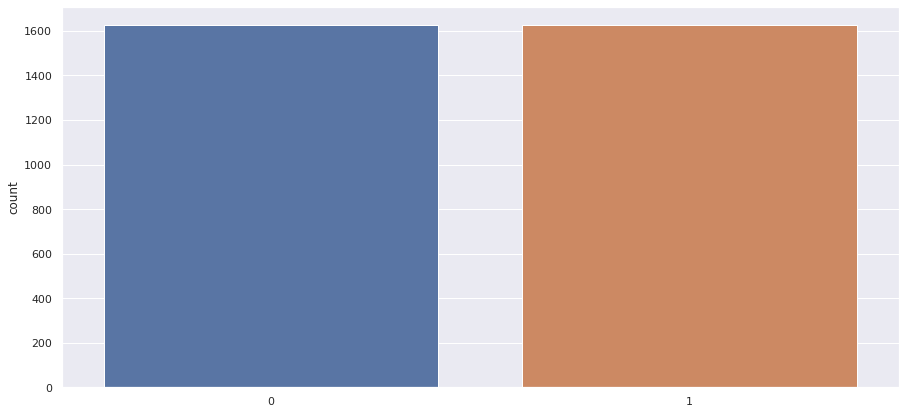

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_under)

In [ ]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(x_under, y_under, random_state = 1, stratify=y_under) 

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_under_train, y_under_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_under_test)

In [ ]:
accuracy_score(y_under_test, y_pred)

0.7923832923832924

In [ ]:
print(classification_report(y_under_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       407
           1       0.81      0.76      0.79       407

    accuracy                           0.79       814
   macro avg       0.79      0.79      0.79       814
weighted avg       0.79      0.79      0.79       814



# **GRADIENT BOOSTING CLASSIFIER**

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_under_train, y_under_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gb_pred = gb.predict(X_under_test)

In [ ]:
print(classification_report(y_under_test, gb_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       407
           1       0.95      0.93      0.94       407

    accuracy                           0.94       814
   macro avg       0.94      0.94      0.94       814
weighted avg       0.94      0.94      0.94       814



# **SMOTE** 